# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import EarlyStopping

# Importing Dataset

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Checking Null

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Descriptive Stats

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Visualization

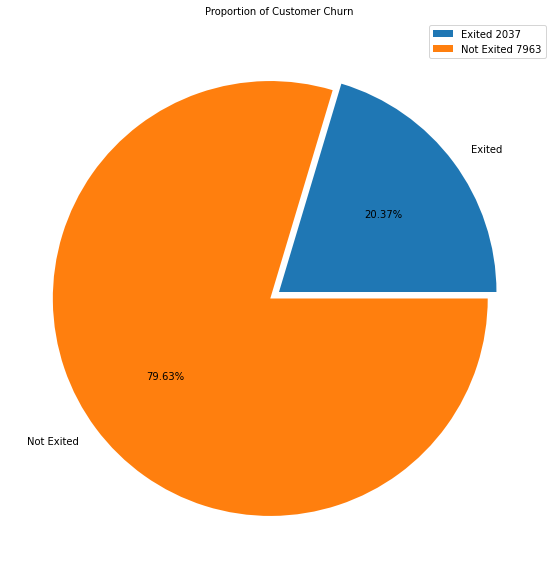

In [7]:
exited = df[df['Exited']==1]['CustomerId'].count()
noExited = df[df['Exited']==0]['CustomerId'].count()

plt.subplots(figsize=(10, 10))
plt.title("Proportion of Customer Churn", size = 10)
plt.pie([exited, noExited],labels = ['Exited', 'Not Exited'], autopct='%.2f%%', explode = (0 , 0.05))
plt.legend(labels = ['Exited ' + str(exited), 'Not Exited ' + str(noExited)], loc = "upper right")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

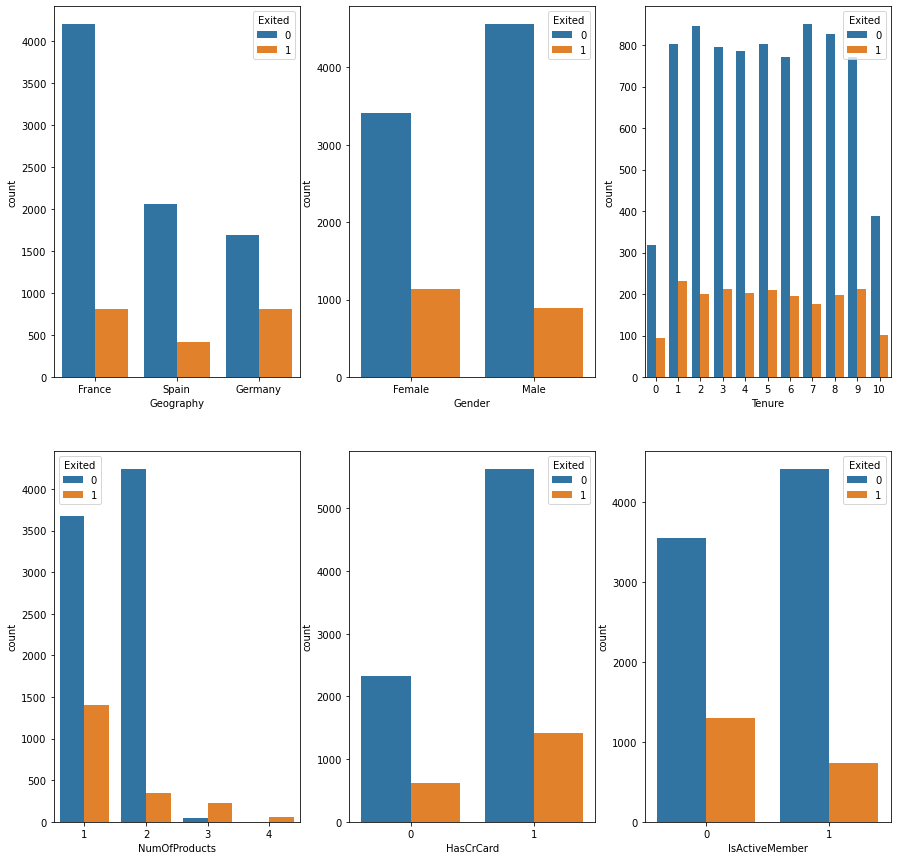

In [8]:
fig, axarr = plt.subplots(2, 3, figsize=(15, 15))

sns.countplot('Geography', hue = 'Exited',data = df, ax = axarr[0][0])
sns.countplot('Gender', hue = 'Exited',data = df, ax = axarr[0][1])
sns.countplot('Tenure', hue = 'Exited',data = df, ax = axarr[0][2])
sns.countplot('NumOfProducts', hue = 'Exited',data = df, ax = axarr[1][0])
sns.countplot('HasCrCard', hue = 'Exited',data = df, ax = axarr[1][1])
sns.countplot('IsActiveMember', hue = 'Exited',data = df, ax = axarr[1][2])

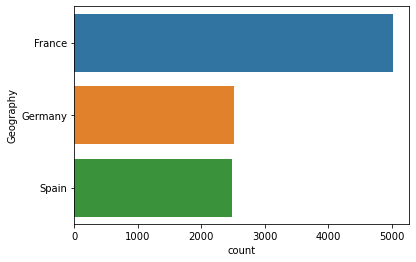

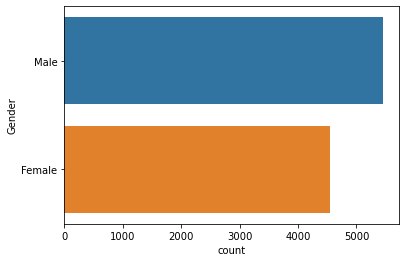

In [9]:
sns.countplot(y=df['Geography'], data=df, order = df['Geography'].value_counts().index)
plt.show()

sns.countplot(y=df['Gender'], data=df, order = df['Gender'].value_counts().index)
plt.show()

<AxesSubplot:>

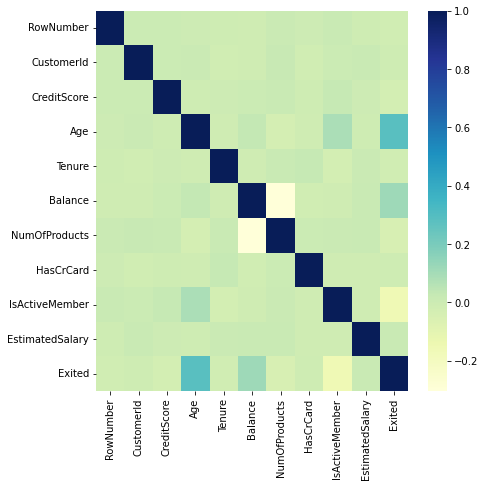

In [10]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), cmap="YlGnBu")

# Data cleansing

In [11]:
df.drop("CustomerId", axis=1, inplace=True)
df.drop("Surname", axis=1, inplace=True)
df.drop("HasCrCard", axis=1, inplace=True)
df.drop("RowNumber", axis=1, inplace = True)
# Take all Row, Take all column until -1
X = df.iloc[:,:-1].values
# Take all Row, Take only -1 column
y = df.iloc[:,-1].values

# Encoding Categorical Data

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 1 1 112542.58]
 [502 'France' 'Female' ... 3 0 113931.57]
 ...
 [709 'France' 'Female' ... 1 1 42085.58]
 [772 'Germany' 'Male' ... 2 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [14]:
print(y)

[1 0 1 ... 1 1 0]


# Label Encoding the Gender

In [15]:
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 1 1 112542.58]
 [502 'France' 0 ... 3 0 113931.57]
 ...
 [709 'France' 0 ... 1 1 42085.58]
 [772 'Germany' 1 ... 2 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


# One Hot Encoder for Country

In [16]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 1 1 112542.58]
 [1.0 0.0 0.0 ... 3 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 1 1 42085.58]
 [0.0 1.0 0.0 ... 2 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


# Spliting Dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

# Feature Scalling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Importing TensorFlow and Initializing ANN

In [19]:
import tensorflow as tf

In [20]:
ann = tf.keras.models.Sequential()

In [21]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [22]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [23]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the Model

In [24]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the Model

In [25]:
ann.fit(X_train, y_train, batch_size=32,epochs=200)

Epoch 1/200
250/250 [==============================] - 0s 892us/step - loss: 0.5850 - accuracy: 0.7412
Epoch 2/200
250/250 [==============================] - 0s 844us/step - loss: 0.4861 - accuracy: 0.7960
Epoch 3/200
250/250 [==============================] - 0s 836us/step - loss: 0.4455 - accuracy: 0.8018
Epoch 4/200
250/250 [==============================] - 0s 940us/step - loss: 0.4306 - accuracy: 0.8081
Epoch 5/200
250/250 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.8109
Epoch 6/200
250/250 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.8130
Epoch 7/200
250/250 [==============================] - 0s 972us/step - loss: 0.4142 - accuracy: 0.8158
Epoch 8/200
250/250 [==============================] - 0s 676us/step - loss: 0.4047 - accuracy: 0.8192
Epoch 9/200
250/250 [==============================] - 0s 608us/step - loss: 0.3910 - accuracy: 0.8279
Epoch 10/200
250/250 [==============================] - 0s 760us/step - loss:

250/250 [==============================] - 0s 736us/step - loss: 0.3326 - accuracy: 0.8622
Epoch 80/200
250/250 [==============================] - 0s 684us/step - loss: 0.3328 - accuracy: 0.8625
Epoch 81/200
250/250 [==============================] - 0s 744us/step - loss: 0.3326 - accuracy: 0.8631
Epoch 82/200
250/250 [==============================] - 0s 764us/step - loss: 0.3323 - accuracy: 0.8639
Epoch 83/200
250/250 [==============================] - 0s 756us/step - loss: 0.3321 - accuracy: 0.86300s - loss: 0.3299 - accuracy: 0.86
Epoch 84/200
250/250 [==============================] - 0s 848us/step - loss: 0.3325 - accuracy: 0.8633
Epoch 85/200
250/250 [==============================] - 0s 720us/step - loss: 0.3326 - accuracy: 0.8634
Epoch 86/200
250/250 [==============================] - 0s 720us/step - loss: 0.3325 - accuracy: 0.8651
Epoch 87/200
250/250 [==============================] - 0s 784us/step - loss: 0.3321 - accuracy: 0.8636
Epoch 88/200
250/250 [=====================

250/250 [==============================] - 0s 728us/step - loss: 0.3305 - accuracy: 0.8631
Epoch 156/200
250/250 [==============================] - 0s 832us/step - loss: 0.3306 - accuracy: 0.8630
Epoch 157/200
250/250 [==============================] - 0s 728us/step - loss: 0.3306 - accuracy: 0.8635
Epoch 158/200
250/250 [==============================] - 0s 928us/step - loss: 0.3309 - accuracy: 0.8634
Epoch 159/200
250/250 [==============================] - 0s 708us/step - loss: 0.3307 - accuracy: 0.8622
Epoch 160/200
250/250 [==============================] - 0s 656us/step - loss: 0.3306 - accuracy: 0.8615
Epoch 161/200
250/250 [==============================] - 0s 716us/step - loss: 0.3307 - accuracy: 0.8627
Epoch 162/200
250/250 [==============================] - 0s 700us/step - loss: 0.3304 - accuracy: 0.8627
Epoch 163/200
250/250 [==============================] - 0s 752us/step - loss: 0.3312 - accuracy: 0.8633
Epoch 164/200
250/250 [==============================] - 0s 736us/ste

# Confusion Matrix

In [26]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1512   83]
 [ 196  209]]


0.8605